# Technical Analysis Trading Bot in Python

Author: Krish Gawande


### Step 1: Build program to buy and sell stocks based on technical analysis

Import libraries 
- pandas
- NumPy
- Matplotlib
- yfinance

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf
import talib as ta

Get historical stock price data using Yahoo Finance API

In [199]:
# Check AAPL stock data on 2023-11-05
ticker = "AAPL"
start_date = "2022-11-11"
end_date = "2024-11-11"

# Check data
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-11-11  148.142136  149.699997  150.009995  144.369995  145.820007   
2022-11-14  146.736923  148.279999  150.279999  147.429993  148.970001   
2022-11-15  148.478622  150.039993  153.589996  148.559998  152.220001   
2022-11-16  147.241608  148.789993  149.869995  147.289993  149.130005   
2022-11-17  149.151535  150.720001  151.479996  146.149994  146.429993   

Price         Volume  
Ticker          AAPL  
Date                  
2022-11-11  93979700  
2022-11-14  73374100  
2022-11-15  89868300  
2022-11-16  64218300  
2022-11-17  80389400  


Use Technical Analysis to analyze stock prices
- Directional Movement Index (DMI)
- Relative Strength Index (RSI)
- Bollinger Bands (BB)

In [200]:
# Calculate the 20-day and 50-day SMA
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Initialize a Signal column
data['Signal'] = 0  # Default to no signal

# Generate buy and sell signals
data['Signal'] = (data['SMA_20'] > data['SMA_50']).astype(int)  # 1 for buy, 0 for sell

# Identify buy signals (when SMA_20 crosses above SMA_50)
data['Buy_Signal'] = (data['Signal'] == 1) & (data['Signal'].shift(1) == 0)

# Identify sell signals (when SMA_20 crosses below SMA_50)
data['Sell_Signal'] = (data['Signal'] == 0) & (data['Signal'].shift(1) == 1)



Show the buy and sell signals

In [201]:
# Extract buy signals
buy_signals = data.loc[data['Buy_Signal'], ['Close', 'SMA_20', 'SMA_50']]
buy_signals['Signal_Type'] = 'Buy'

# Extract sell signals
sell_signals = data.loc[data['Sell_Signal'], ['Close', 'SMA_20', 'SMA_50']]
sell_signals['Signal_Type'] = 'Sell'

# Combine both buy and sell signals for clarity
signals = pd.concat([buy_signals, sell_signals]).sort_index()

# Print buy and sell signals
print(signals)

Price            Close      SMA_20      SMA_50 Signal_Type
Ticker            AAPL                                    
Date                                                      
2023-02-03  154.500000  139.493999  138.890400         Buy
2023-08-16  176.570007  186.943501  187.299801        Sell
2023-11-14  187.440002  176.553501  176.335601         Buy
2024-01-17  182.679993  188.796999  189.315800        Sell
2024-05-08  182.740005  172.552000  172.399200         Buy
2024-08-20  226.509995  218.544501  218.846601        Sell
2024-08-29  229.789993  221.434000  221.211200         Buy


Use SMA to create buy or sell signals for stocks.

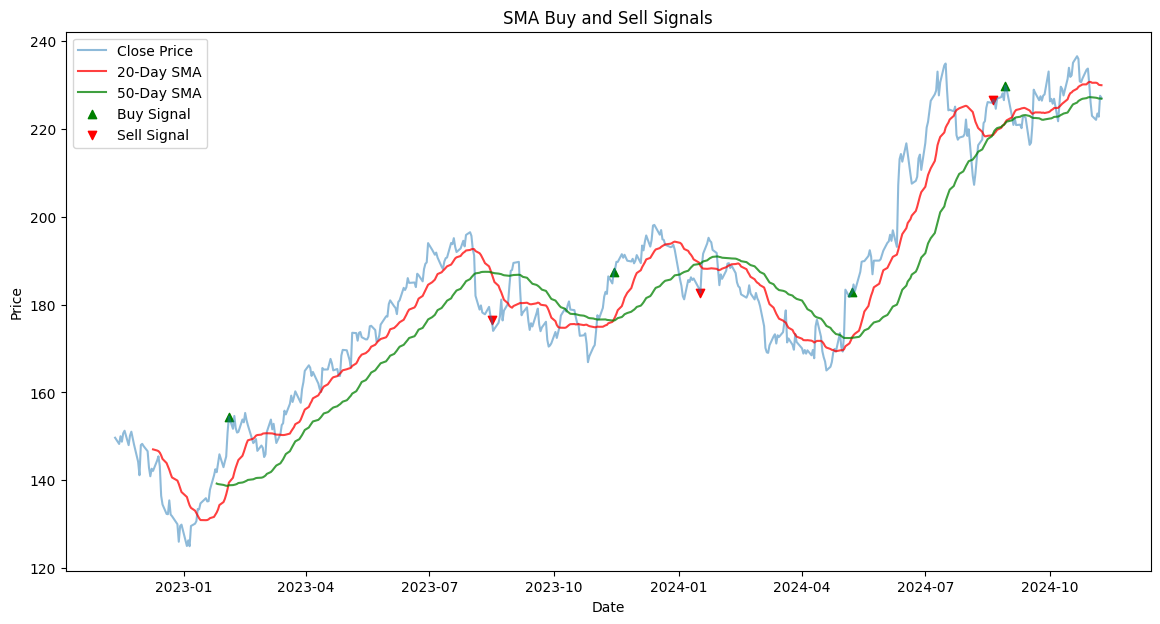

In [202]:
# Plot the stock data and SMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_20'], label='20-Day SMA', alpha=0.75, color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', alpha=0.75, color='green')

# Mark buy signals
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', alpha=1)

# Mark sell signals
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

# Add labels and legend
plt.title('SMA Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Testing SMA Strategy Performance

# Initialize variables for the evaluation
final_portfolio_value = 10000  # Final value from the backtest
initial_portfolio_value = 10000  # Starting capital
strategy_returns = ((final_portfolio_value - initial_portfolio_value) / initial_portfolio_value) * 100

# Buy-and-Hold Returns
buy_and_hold_returns = ((data.iloc[-1]['Close'] - data.iloc[0]['Close']) / data.iloc[0]['Close']) * 100

# Number of Trades
transactions = []


# Calculate Win Rate
if not transactions.empty:
    profit_trades = [
        (transactions.iloc[i + 1]['Price'] - transactions.iloc[i]['Price']) > 0
        for i in range(0, len(transactions) - 1, 2)  # Every buy-sell pair
    ]
    win_rate = (sum(profit_trades) / len(profit_trades)) * 100
else:
    win_rate = 0

# Calculate Maximum Drawdown
portfolio_values = []
current_cash = 5000
current_shares = 0

# Simulate portfolio value over time
for _, row in data.iterrows():
    if row['Buy_Signal'] and current_cash > 0:  # Simulate buying
        current_shares = current_cash // row['Close']
        current_cash -= current_shares * row['Close']
    if row['Sell_Signal'] and current_shares > 0:  # Simulate selling
        current_cash += current_shares * row['Close']
        current_shares = 0
    portfolio_values.append(current_cash + current_shares * row['Close'])

# Calculate Maximum Drawdown
rolling_max = pd.Series(portfolio_values).cummax()
drawdowns = pd.Series(portfolio_values) / rolling_max - 1
max_drawdown = drawdowns.min()

# Print Results
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Strategy Returns: {strategy_returns:.2f}%")
print(f"Buy-and-Hold Returns: {buy_and_hold_returns:.2f}%")
print(f"Number of Trades: {num_trades}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

# Plot Portfolio Value Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, portfolio_values, label="SMA Strategy Portfolio Value", color="blue")
plt.axhline(initial_portfolio_value, color='red', linestyle='--', label="Initial Capital")
plt.title("Portfolio Value Over Time (SMA Strategy)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# Compare Strategy Returns with Buy-and-Hold
plt.figure(figsize=(8, 5))
plt.bar(['SMA Strategy', 'Buy-and-Hold'], [strategy_returns, buy_and_hold_returns], color=['blue', 'green'])
plt.title('Strategy Returns vs Buy-and-Hold Returns')
plt.ylabel('Returns (%)')
plt.grid(axis='y')
plt.show()